In [182]:
#import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hps import Hyperparams, cifar10, parse_args_and_update_hparams
from train_helpers import set_up_hyperparams, load_vaes, add_vae_arguments
from train import set_up_data, get_sample_for_visualization
import argparse, imageio
import matplotlib.pyplot as plt
import numpy as np
import torch.distributed as dist
from torch.utils.data import Sampler, DataLoader
from torch.utils.data import TensorDataset
import torch
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from hier_compression import RD_points, RD_points_step, preprocess_RD_for_mean_plot, get_cum_rate_from_RD, permute_channels, flip_images, add_gaussian_noise_to_images

In [4]:
#load model, data
model_path = '/mnt/workspace/vdvae/models/ffhq-256/ffhq256-iter-1700000-model-ema.th'
H, logprint = set_up_hyperparams(s=['--restore_ema_path', model_path, '--hps', 'ffhq256', '--test_eval'])
H, data_train, data_valid_or_test, preprocess_fn = set_up_data(H)
vae, ema_vae = load_vaes(H, logprint)

time: Tue Sep  7 15:59:23 2021, type: hparam, key: adam_beta1, value: 0.90000
time: Tue Sep  7 15:59:23 2021, type: hparam, key: adam_beta2, value: 0.90000
time: Tue Sep  7 15:59:23 2021, type: hparam, key: bottleneck_multiple, value: 0.25000
time: Tue Sep  7 15:59:23 2021, type: hparam, key: custom_width_str, value: 
time: Tue Sep  7 15:59:23 2021, type: hparam, key: data_root, value: ./
time: Tue Sep  7 15:59:23 2021, type: hparam, key: dataset, value: ffhq_256
time: Tue Sep  7 15:59:23 2021, type: hparam, key: dec_blocks, value: 1x2,4m1,4x3,8m4,8x4,16m8,16x9,32m16,32x21,64m32,64x13,128m64,128x7,256m128
time: Tue Sep  7 15:59:23 2021, type: hparam, key: desc, value: test
time: Tue Sep  7 15:59:23 2021, type: hparam, key: ema_rate, value: 0.99900
time: Tue Sep  7 15:59:23 2021, type: hparam, key: enc_blocks, value: 256x3,256d2,128x8,128d2,64x12,64d2,32x17,32d2,16x7,16d2,8x5,8d2,4x5,4d4,1x4
time: Tue Sep  7 15:59:23 2021, type: hparam, key: epochs_per_eval, value: 1
time: Tue Sep  7 15

In [578]:
data_loader = DataLoader(data_valid_or_test, batch_size=16, drop_last=True, pin_memory=True)

In [579]:
x = next(iter(data_loader))

In [ ]:
file_name_to_save = '/mnt/workspace/RD_data/ffhq-256/in/ffhq256-iter-1700000-model-ema.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=6, file_name_to_save=file_name_to_save)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [ ]:
file_name_to_save_flip = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema-flip.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=6, file_name_to_save=file_name_to_save_flip, transform_fn=flip_images)

In [8]:
2

2

In [ ]:
file_name_to_save_channel='/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema-channel.pickle'
RD_channel = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=6, file_name_to_save=file_name_to_save_channel, transform_fn=permute_channels)

In [ ]:
file_name_to_save_noise_1 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_1.pickle'
RD_noise_1 = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=6, file_name_to_save=file_name_to_save_noise_1, transform_fn=add_gaussian_noise_to_images, std=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
file_name_to_save_noise_5 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_5.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=6, file_name_to_save=file_name_to_save_noise_5, transform_fn=add_gaussian_noise_to_images, std=5)

In [ ]:
file_name_to_save_noise_10 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_10.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=6, file_name_to_save=file_name_to_save_noise_10, transform_fn=add_gaussian_noise_to_images, std=10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
file_name_to_save_noise_20 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_20.pickle'
RD = RD_points(ema_vae, data_valid_or_test, preprocess_fn, batch_size=6, file_name_to_save=file_name_to_save_noise_20, transform_fn=add_gaussian_noise_to_images, std=20)

In [31]:
file_name_to_save = '/mnt/workspace/RD_data/ffhq-256/in/ffhq256-iter-1700000-model-ema.pickle'
with open(file_name_to_save, 'rb') as f:
    RD = pickle.load(f)

In [32]:
file_name_to_save_channel='/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema-channel.pickle'
with open(file_name_to_save_channel, 'rb') as f:
    RD_channel = pickle.load(f)

In [33]:
file_name_to_save_flip='/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema-flip.pickle'
with open(file_name_to_save_flip, 'rb') as f:
    RD_flip = pickle.load(f)

In [34]:
#file_name_to_save_flip_upside='/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-flip_upside.pickle'
#with open(file_name_to_save_flip_upside, 'rb') as f:
#    RD_flip_upside = pickle.load(f)

In [35]:
#file_name_to_save_flip_LR='/mnt/workspace/RD_data/cifar-10/out/cifar10-seed0-iter-900000-model-ema-flip_LR.pickle'
#with open(file_name_to_save_flip_LR, 'rb') as f:
#    RD_flip_LR = pickle.load(f)

In [36]:
file_name_to_save_noise_1 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_1.pickle'
with open(file_name_to_save_noise_1, 'rb') as f:
    RD_noise_1 = pickle.load(f)

In [37]:
file_name_to_save_noise_5 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_5.pickle'
with open(file_name_to_save_noise_5, 'rb') as f:
    RD_noise_5 = pickle.load(f)

In [38]:
file_name_to_save_noise_10 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_10.pickle'
with open(file_name_to_save_noise_10, 'rb') as f:
    RD_noise_10 = pickle.load(f)

In [39]:
file_name_to_save_noise_20 = '/mnt/workspace/RD_data/ffhq-256/out/ffhq256-iter-1700000-model-ema_noise_20.pickle'
with open(file_name_to_save_noise_20, 'rb') as f:
    RD_noise_20 = pickle.load(f)

In [59]:
cum_rate_mean, cum_num_latents, distortion_mean = preprocess_RD_for_mean_plot(RD)
cum_rate_mean_channel, cum_num_latens_channel, distortion_mean_channel = preprocess_RD_for_mean_plot(RD_channel)
cum_rate_mean_flip, cum_num_latens_flip, distortion_mean_flip = preprocess_RD_for_mean_plot(RD_flip)
cum_rate_mean_noise_1, cum_num_latens_noise_1, distortion_mean_noise_1 = preprocess_RD_for_mean_plot(RD_noise_1)
cum_rate_mean_noise_5, cum_num_latens_noise_5, distortion_mean_noise_5 = preprocess_RD_for_mean_plot(RD_noise_5)
cum_rate_mean_noise_10, cum_num_latens_noise_10, distortion_mean_noise_10 = preprocess_RD_for_mean_plot(RD_noise_10)
cum_rate_mean_noise_20, cum_num_latens_noise_20, distortion_mean_noise_20 = preprocess_RD_for_mean_plot(RD_noise_20)

In [414]:
cum_rate_mean, cum_num_latents, distortion_mean, num_nans = preprocess_RD_for_mean_plot(RD, drop_nans=True, return_num_nans=True)
cum_rate_mean_channel, cum_num_latens_channel, distortion_mean_channel, num_nans_channel = preprocess_RD_for_mean_plot(RD_channel, drop_nans=True, return_num_nans=True)
cum_rate_mean_flip, cum_num_latens_flip, distortion_mean_flip, num_nans_flip = preprocess_RD_for_mean_plot(RD_flip, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_1, cum_num_latens_noise_1, distortion_mean_noise_1, num_nans_noise_1 = preprocess_RD_for_mean_plot(RD_noise_1, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_5, cum_num_latens_noise_5, distortion_mean_noise_5, num_nans_noise_5 = preprocess_RD_for_mean_plot(RD_noise_5, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_10, cum_num_latens_noise_10, distortion_mean_noise_10, num_nans_noise_10 = preprocess_RD_for_mean_plot(RD_noise_10, drop_nans=True, return_num_nans=True)
cum_rate_mean_noise_20, cum_num_latens_noise_20, distortion_mean_noise_20, num_nans_noise_20 = preprocess_RD_for_mean_plot(RD_noise_20, drop_nans=True, return_num_nans=True)

In [56]:
cum_rate_mean_in, cum_num_latents_in, distortion_mean_in, num_nans_in = preprocess_RD_for_mean_plot(RD, replace_infs=1000, return_num_nans=True)
cum_rate_mean_channel, cum_num_latens_channel, distortion_mean_channel, num_nans_channel = preprocess_RD_for_mean_plot(RD_channel, replace_infs=1000, return_num_nans=True)
cum_rate_mean_flip, cum_num_latens_flip, distortion_mean_flip, num_nans_flip = preprocess_RD_for_mean_plot(RD_flip, replace_infs=1000, return_num_nans=True)
cum_rate_mean_noise_1, cum_num_latens_noise_1, distortion_mean_noise_1, num_nans_noise_1 = preprocess_RD_for_mean_plot(RD_noise_1, replace_infs=1000, return_num_nans=True)
cum_rate_mean_noise_5, cum_num_latens_noise_5, distortion_mean_noise_5, num_nans_noise_5 = preprocess_RD_for_mean_plot(RD_noise_5, replace_infs=1000, return_num_nans=True)
cum_rate_mean_noise_10, cum_num_latens_noise_10, distortion_mean_noise_10, num_nans_noise_10 = preprocess_RD_for_mean_plot(RD_noise_10, replace_infs=1000, return_num_nans=True)
cum_rate_mean_noise_20, cum_num_latens_noise_20, distortion_mean_noise_20, num_nans_noise_20 = preprocess_RD_for_mean_plot(RD_noise_20, replace_infs=1000, return_num_nans=True)

In [70]:
ddiff = np.diff(distortion_mean)

In [71]:
cr_diff = np.diff(cum_rate_mean)

In [63]:
num_nans_noise_10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


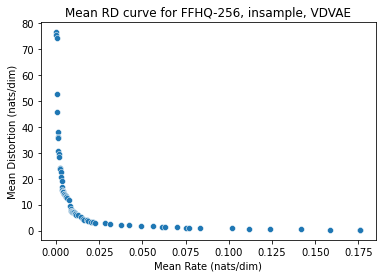

In [45]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for FFHQ-256, insample, VDVAE')
sns.scatterplot(cum_rate_mean, distortion_mean)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


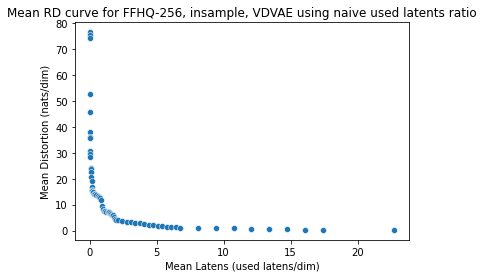

In [46]:
plt.xlabel('Mean Latens (used latens/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for FFHQ-256, insample, VDVAE using naive used latents ratio')
sns.scatterplot(cum_num_latents, distortion_mean)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


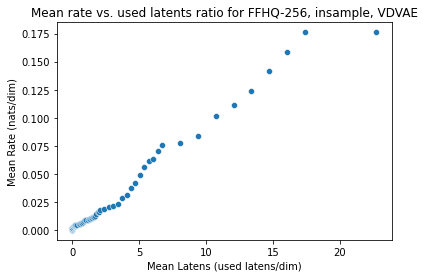

In [47]:
plt.xlabel('Mean Latens (used latens/dim)')
plt.ylabel('Mean Rate (nats/dim)')
plt.title('Mean rate vs. used latents ratio for FFHQ-256, insample, VDVAE')
sns.scatterplot(cum_num_latents, cum_rate_mean)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


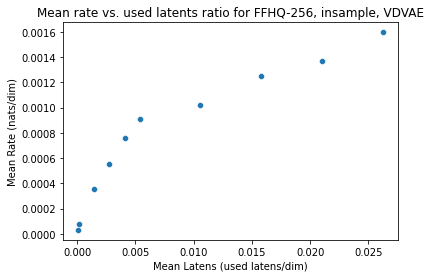

In [48]:
plt.xlabel('Mean Latens (used latens/dim)')
plt.ylabel('Mean Rate (nats/dim)')
plt.title('Mean rate vs. used latents ratio for FFHQ-256, insample, VDVAE')
sns.scatterplot(cum_num_latents[:10], cum_rate_mean[:10])

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


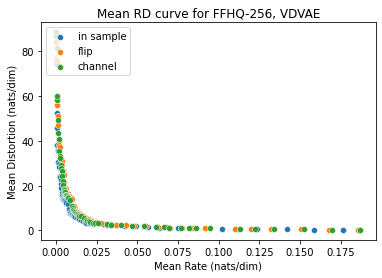

In [49]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for FFHQ-256, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


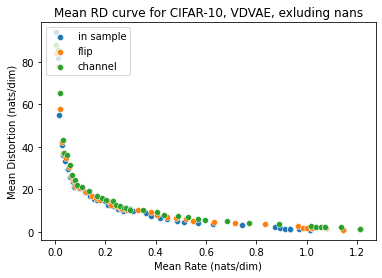

In [515]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, exluding nans')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


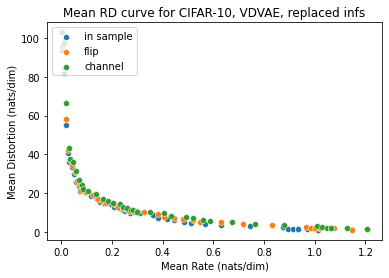

In [464]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, replaced infs')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-package

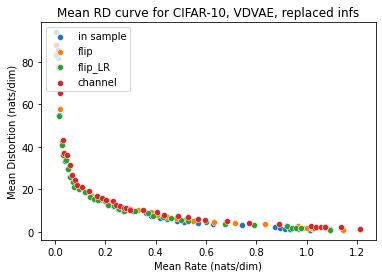

In [603]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, replaced infs')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_flip_LR, distortion_mean_flip_LR, label="flip_LR")
sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


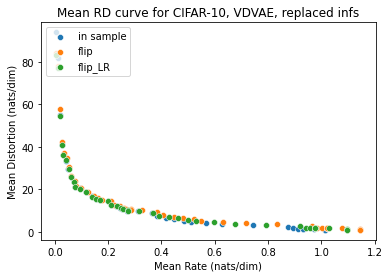

In [605]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for CIFAR-10, VDVAE, replaced infs')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_flip, distortion_mean_flip, label="flip")
sns.scatterplot(cum_rate_mean_flip_LR, distortion_mean_flip_LR, label="flip_LR")
#sns.scatterplot(cum_rate_mean_channel, distortion_mean_channel, label="channel")
plt.legend(loc="upper left")

In [564]:
cum_rate_mean_in

array([0.00454424, 0.01193185, 0.01799156, 0.02655208, 0.03197506,
       0.04202674, 0.05121394, 0.058923  , 0.07078948, 0.07510252,
       0.0942874 , 0.11786227, 0.14045271, 0.15490219, 0.16832356,
       0.19841722, 0.2093258 , 0.23001562, 0.2454515 , 0.25165492,
       0.27049857, 0.27052033, 0.31159353, 0.36280546, 0.3818178 ,
       0.41610497, 0.4464979 , 0.48415372, 0.51121   , 0.56754845,
       0.6287043 , 0.74450237, 0.8743122 , 0.89478916, 0.9128827 ,
       0.9321823 , 0.9321825 , 0.9321828 , 0.9321831 , 0.97050047,
       1.0117404 , 1.0117407 , 1.0117408 ], dtype=float32)

In [565]:
cum_rate_mean_flip_upside

array([0.00454424, 0.01193023, 0.0179927 , 0.02655999, 0.03197528,
       0.04203033, 0.05123441, 0.05894982, 0.07075319, 0.07506465,
       0.09430421, 0.1178377 , 0.1404565 , 0.15495162, 0.16841154,
       0.19851221, 0.20942715, 0.2301477 , 0.24558693, 0.25186375,
       0.27068344, 0.2707052 , 0.31188905, 0.3630847 , 0.38210517,
       0.41654024, 0.44691464, 0.48448202, 0.5115344 , 0.56795675,
       0.6291391 , 0.7450717 , 0.8748086 , 0.8951666 , 0.91313845,
       0.9323421 , 0.9323423 , 0.9323426 , 0.9323429 , 0.9707322 ,
       1.0120119 , 1.0120121 , 1.0120124 ], dtype=float32)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


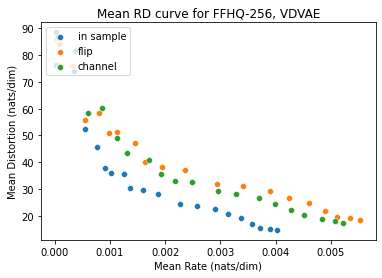

In [50]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for FFHQ-256, VDVAE')
sns.scatterplot(cum_rate_mean_in[:20], distortion_mean_in[:20], label="in sample")
sns.scatterplot(cum_rate_mean_flip[:20], distortion_mean_flip[:20], label="flip")
sns.scatterplot(cum_rate_mean_channel[:20], distortion_mean_channel[:20], label="channel")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-package

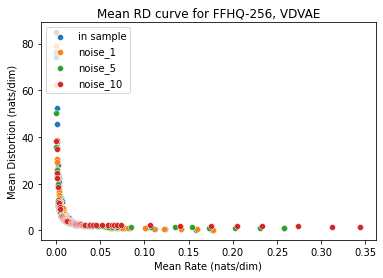

In [51]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for FFHQ-256, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_noise_1, distortion_mean_noise_1, label="noise_1")
sns.scatterplot(cum_rate_mean_noise_5, distortion_mean_noise_5, label="noise_5")
sns.scatterplot(cum_rate_mean_noise_10, distortion_mean_noise_10, label="noise_10")
#sns.scatterplot(cum_rate_mean_noise_20, distortion_mean_noise_20, label="noise_20")
plt.legend(loc="upper left")

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-package

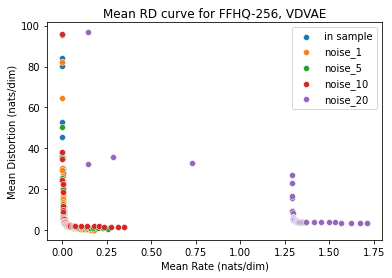

In [58]:
plt.xlabel('Mean Rate (nats/dim)')
plt.ylabel('Mean Distortion (nats/dim)')
plt.title('Mean RD curve for FFHQ-256, VDVAE')
sns.scatterplot(cum_rate_mean_in, distortion_mean_in, label="in sample")
sns.scatterplot(cum_rate_mean_noise_1, distortion_mean_noise_1, label="noise_1")
sns.scatterplot(cum_rate_mean_noise_5, distortion_mean_noise_5, label="noise_5")
sns.scatterplot(cum_rate_mean_noise_10, distortion_mean_noise_10, label="noise_10")
sns.scatterplot(cum_rate_mean_noise_20, distortion_mean_noise_20, label="noise_20")
#plt.legend(loc="upper left")

In [72]:
ddiff = np.diff(distortion_mean)

In [73]:
cr_diff = np.diff(cum_rate_mean)

In [74]:
ddiff[-10:]

array([-0.08232784, -0.09882993, -0.0282858 , -0.10469091, -0.20251381,
       -0.09305644, -0.08983105, -0.11027771, -0.06641823, -0.05611679],
      dtype=float32)

In [78]:
2*cr_diff[-10:]

array([1.05974414e-02, 3.53644425e-03, 1.30333846e-02, 3.63484665e-02,
       1.99960191e-02, 2.37053912e-02, 3.61558730e-02, 3.40499670e-02,
       3.49874836e-02, 7.25849429e-08])

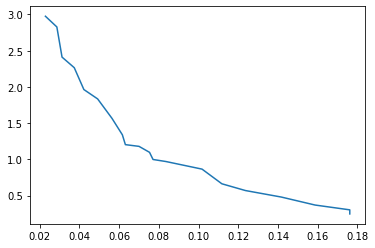

In [80]:
plt.plot(cum_rate_mean[-20:], distortion_mean[-20:])